In [1]:
import os
import glob
import pandas as pd
from tqdm import tqdm

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Baseline

In [28]:
df = pd.read_pickle("../mimic-iv-3.1/final_microbiology_df.pkl")

In [29]:
# final pairs 
pairs = [('ESCHERICHIA COLI', 'AMPICILLIN'),
 ('ESCHERICHIA COLI', 'AMPICILLIN/SULBACTAM'),
 ('ESCHERICHIA COLI', 'CEFAZOLIN'),
 ('ESCHERICHIA COLI', 'CEFEPIME'),
 ('ESCHERICHIA COLI', 'CEFTAZIDIME'),
 ('ESCHERICHIA COLI', 'CEFTRIAXONE'),
 ('ESCHERICHIA COLI', 'CIPROFLOXACIN'),
 ('ESCHERICHIA COLI', 'GENTAMICIN'),
 ('ESCHERICHIA COLI', 'MEROPENEM'),
 ('ESCHERICHIA COLI', 'NITROFURANTOIN'),
 ('ESCHERICHIA COLI', 'TOBRAMYCIN'),
 ('ESCHERICHIA COLI', 'TRIMETHOPRIM/SULFA'),
 ('PSEUDOMONAS AERUGINOSA', 'CEFEPIME'),
 ('PSEUDOMONAS AERUGINOSA', 'CEFTAZIDIME'),
 ('PSEUDOMONAS AERUGINOSA', 'CIPROFLOXACIN'),
 ('PSEUDOMONAS AERUGINOSA', 'GENTAMICIN'),
 ('PSEUDOMONAS AERUGINOSA', 'MEROPENEM'),
 ('PSEUDOMONAS AERUGINOSA', 'PIPERACILLIN/TAZO'),
 ('PSEUDOMONAS AERUGINOSA', 'TOBRAMYCIN'),
 ('ESCHERICHIA COLI', 'PIPERACILLIN/TAZO'),
 ('KLEBSIELLA PNEUMONIAE', 'AMPICILLIN/SULBACTAM'),
 ('KLEBSIELLA PNEUMONIAE', 'CEFAZOLIN'),
 ('KLEBSIELLA PNEUMONIAE', 'CEFEPIME'),
 ('KLEBSIELLA PNEUMONIAE', 'CEFTAZIDIME'),
 ('KLEBSIELLA PNEUMONIAE', 'CEFTRIAXONE'),
 ('KLEBSIELLA PNEUMONIAE', 'CIPROFLOXACIN'),
 ('KLEBSIELLA PNEUMONIAE', 'GENTAMICIN'),
 ('KLEBSIELLA PNEUMONIAE', 'MEROPENEM'),
 ('KLEBSIELLA PNEUMONIAE', 'NITROFURANTOIN'),
 ('KLEBSIELLA PNEUMONIAE', 'PIPERACILLIN/TAZO'),
 ('KLEBSIELLA PNEUMONIAE', 'TOBRAMYCIN'),
 ('KLEBSIELLA PNEUMONIAE', 'TRIMETHOPRIM/SULFA')]

df = df[df[['org_name', 'ab_name']].apply(tuple, axis=1).isin(pairs)]

In [30]:
# get unique org & ab combos 
org_ab_label = df[['org_name', 'ab_name']].drop_duplicates()

In [31]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# for each label calculate metrics for majority classifier 
baselines = []

for index, row in org_ab_label.iterrows():
    org = f"{row.org_name}"
    ab = f"{row.ab_name}"
    sub = df.query(f"org_name == '{org}' & ab_name == '{ab}'")
    y_true = sub.susceptible_flag 

    if (y_true.sum() / len(y_true)) > 0.5:
        maj_class = 1
    else:
        maj_class = 0
    
    y_pred = [maj_class] * len(y_true)
    
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    metrics = {'bacteria':org, 'antibiotic':ab, 'accuracy':accuracy, 'precision':precision, 'recall':recall, 'f1_score':f1}
    baselines.append(metrics)

C:\Users\brian\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
baseline_results = pd.DataFrame(baselines)
baseline_results

,bacteria,antibiotic,accuracy,precision,recall,f1_score
0,ESCHERICHIA COLI,AMPICILLIN,0.503929,0.503929,1.0,0.670150
1,ESCHERICHIA COLI,AMPICILLIN/SULBACTAM,0.611413,0.611413,1.0,0.758853
2,ESCHERICHIA COLI,CEFAZOLIN,0.805609,0.805609,1.0,0.892341
3,ESCHERICHIA COLI,CEFEPIME,0.915470,0.915470,1.0,0.955870
4,ESCHERICHIA COLI,CEFTAZIDIME,0.921242,0.921242,1.0,0.959007
5,ESCHERICHIA COLI,CEFTRIAXONE,0.882644,0.882644,1.0,0.937664
6,ESCHERICHIA COLI,CIPROFLOXACIN,0.732396,0.732396,1.0,0.845530
7,ESCHERICHIA COLI,GENTAMICIN,0.897404,0.897404,1.0,0.945928
8,ESCHERICHIA COLI,MEROPENEM,0.998653,0.998653,1.0,0.999326
9,ESCHERICHIA COLI,NITROFURANTOIN,0.956875,0.956875,1.0,0.977962


In [12]:
baseline_results.to_excel("../mimic-iv-3.1/base_results_2025_03_09.xlsx", index=False)

### Imports

In [3]:
# Brian's data
# df = pd.read_csv("../mimic-iv-3.1/ecoli_targets_w_lab_features.csv.gz", compression="gzip")
df = pd.read_csv("../mimic-iv-3.1/targets_w_lab_features_v3a.csv.gz", compression="gzip")

In [4]:
# Kat's data
omr_df = pd.read_csv("../mimic-iv-3.1/df_omr_pt_ad_diag_proc_pr.csv")

In [5]:
print(df.shape)
print(omr_df.shape)

(504738, 54)
(35529, 978)


### Merge

In [6]:
df = df.merge(omr_df, 
              on=["subject_id","charttime"], 
              how="left")

In [7]:
df.shape

(504738, 1030)

In [8]:
# Count NaN values in each of the new lab test columns
nan_counts = df.isna().sum()

# Display the result
print(nan_counts)
print(df.shape[0])

subject_id                                      0
org_name                                        0
ab_name                                         0
charttime                                       0
interpretation                                  0
susceptible_flag                                0
charttime_target                                0
Blood - Hematocrit                          48598
Blood - Platelet Count                      51996
Blood - MCV                                 47240
Blood - Red Blood Cells                     41891
Blood - RDW                                 41876
Blood - MCH                                 41828
Blood - MCHC                                41826
Blood - White Blood Cells                   50783
Blood - Creatinine                          50738
Blood - Urea Nitrogen                       47044
Blood - Potassium                          121961
Blood - Sodium                             110031
Blood - Chloride                            55369


### Feature Selection

In [9]:
omr_features = omr_df.columns.tolist()
drop_from_omr = [
    'subject_id',
    'charttime',
    'Height (Inches)', #
    'Weight (Lbs)', #
    'bp_systolic', #
    'bp_diastolic', #
    'gender', #
    'anchor_age', #
    'insurance', #
    'language', #
    'marital_status', #
    'race', #
    'procedure_ct', #
    'days_since_last_proc' #
]

omr_features = [col for col in omr_features if col not in drop_from_omr]

In [10]:
ids = ['subject_id','charttime']

pop = ['org_name','ab_name']

target = ['susceptible_flag']

numeric_features = [
    "Blood - Hematocrit",
    "Blood - Platelet Count",
    "Blood - MCV",
    "Blood - Red Blood Cells",
    "Blood - RDW",
    "Blood - MCH",
    "Blood - MCHC",
    "Blood - White Blood Cells",
    "Blood - Creatinine",
    "Blood - Urea Nitrogen",
    "Blood - Potassium",
    "Blood - Sodium",
    "Blood - Chloride",
    "Blood - Bicarbonate",
    "Blood - Anion Gap",
    "Blood - Hemoglobin",
    'Blood - Basophils',
    'Blood - Lymphocytes',
    'Blood - Eosinophils',    
    'Blood - Calcium, Total',
    'Blood - Alanine Aminotransferase (ALT)',
    'Blood - Asparate Aminotransferase (AST)', 
    'Blood - Magnesium',
    'Blood - Phosphate',
    'Blood - INR(PT)',
    'Blood - PT',
    'Blood - Alkaline Phosphatase',
    'Blood - Bilirubin, Total',
#    'Blood - Albumin',
#    'Blood - RDW-SD',
    'Blood - Neutrophils',
#    'Blood - Immature Granulocytes',
#    'Blood - Lactate',
    'Blood - PTT',
    'Urine - Specific Gravity',
    'Urine - pH',
    'anchor_age',
    'Height (Inches)',
    'Weight (Lbs)',
    'bp_systolic',
    'bp_diastolic',
    'procedure_ct',
    'days_since_last_proc'
]


cat_features = [
    "Urine - Leukocytes",
    "Urine - Nitrite",
    "Urine - Bilirubin",
    "Urine - Blood",
    "Urine - Yeast",
    'gender', 
    'insurance', 
    'language',
    'marital_status',
    'race'    
]
flag_features = [
    'Blood - Glucose',
    'Blood - Monocytes',
    'Urine - Urine Color',
    'Urine - Urine Appearance',
    'Urine - Ketone',
    'Urine - Glucose',
    'Urine - Protein',
    'Urine - Epithelial Cells',
    'Urine - RBC',
    'Urine - WBC']

In [11]:
selected_cols = ids+ pop + target + numeric_features + cat_features + flag_features + omr_features
# Filter dataframe
df_filtered = df[selected_cols]

# Display the shape of the new dataframe
print(df_filtered.shape)

(504738, 1028)


### Population Selection

In [12]:
# Drop all NAs
df_filtered2 = df_filtered.dropna()

print(df_filtered2.shape)
df_filtered2.head()

(78304, 1028)


,subject_id,charttime,org_name,ab_name,susceptible_flag,Blood - Hematocrit,Blood - Platelet Count,Blood - MCV,Blood - Red Blood Cells,Blood - RDW,Blood - MCH,Blood - MCHC,Blood - White Blood Cells,Blood - Creatinine,Blood - Urea Nitrogen,Blood - Potassium,Blood - Sodium,Blood - Chloride,Blood - Bicarbonate,Blood - Anion Gap,Blood - Hemoglobin,Blood - Basophils,Blood - Lymphocytes,Blood - Eosinophils,"Blood - Calcium, Total",Blood - Alanine Aminotransferase (ALT),Blood - Asparate Aminotransferase (AST),Blood - Magnesium,Blood - Phosphate,Blood - INR(PT),Blood - PT,Blood - Alkaline Phosphatase,"Blood - Bilirubin, Total",Blood - Neutrophils,Blood - PTT,Urine - Specific Gravity,Urine - pH,anchor_age,Height (Inches),Weight (Lbs),bp_systolic,bp_diastolic,procedure_ct,days_since_last_proc,Urine - Leukocytes,Urine - Nitrite,Urine - Bilirubin,Urine - Blood,Urine - Yeast,gender,insurance,language,marital_status,race,Blood - Glucose,Blood - Monocytes,Urine - Urine Color,Urine - Urine Appearance,Urine - Ketone,Urine - Glucose,Urine - Protein,Urine - Epithelial Cells,Urine - RBC,Urine - WBC,99,BLD001,BLD002,BLD003,BLD004,BLD005,BLD006,BLD007,BLD008,BLD009,BLD010,CIR001,CIR002,CIR003,CIR004,CIR005,CIR006,CIR007,CIR008,CIR009,CIR010,CIR011,CIR012,CIR013,CIR014,CIR015,CIR016,CIR017,CIR018,CIR019,CIR020,CIR021,CIR022,CIR023,CIR024,CIR025,CIR026,CIR027,CIR028,CIR029,CIR030,CIR031,CIR032,CIR033,CIR034,CIR035,CIR036,CIR037,CIR038,CIR039,DEN001,DEN002,DEN003,DIG001,DIG002,DIG003,DIG004,DIG005,DIG006,DIG007,DIG008,DIG009,DIG010,DIG011,DIG012,DIG013,DIG014,DIG015,DIG016,DIG017,DIG018,DIG019,DIG020,DIG021,DIG022,DIG023,DIG024,DIG025,EAR001,EAR002,EAR003,EAR004,EAR005,EAR006,END001,END002,END003,END004,END005,END006,END007,END008,END009,END010,END011,END012,END013,END014,END015,END016,END017,EXT001,EXT002,EXT003,EXT004,EXT005,EXT006,EXT007,EXT008,EXT009,EXT010,EXT011,EXT012,EXT013,EXT014,EXT015,EXT016,EXT017,EXT018,EXT019,EXT020,EXT021,EXT022,EXT023,EXT024,EXT025,EXT026,EXT027,EXT028,EXT029,EXT030,EYE001,EYE002,EYE003,EYE004,EYE005,EYE006,EYE007,EYE008,EYE009,EYE010,EYE011,EYE012,FAC001,FAC002,FAC003,FAC004,FAC005,FAC006,FAC008,FAC009,FAC010,FAC012,FAC013,FAC014,FAC015,FAC016,FAC017,FAC019,FAC020,FAC022,FAC023,FAC024,FAC025,FAC026,FAC027,FAC028,FAC029,FAC030,GEN001,GEN002,GEN003,GEN004,GEN005,GEN006,GEN007,GEN008,GEN009,GEN010,GEN011,GEN012,GEN013,GEN014,GEN015,GEN016,GEN017,GEN018,GEN019,GEN020,GEN021,GEN022,GEN023,GEN024,GEN025,GEN026,INF001,INF002,INF003,INF004,INF005,INF006,INF007,INF008,INF009,INF010,INF011,INF012,INJ001,INJ002,INJ003,INJ004,INJ005,INJ006,INJ007,INJ008,INJ009,INJ010,INJ011,INJ012,INJ013,INJ014,INJ015,INJ016,INJ017,INJ018,INJ019,INJ020,INJ021,INJ022,INJ023,INJ024,INJ025,INJ026,INJ027,INJ028,INJ029,INJ030,INJ031,INJ032,INJ033,INJ034,INJ035,INJ036,INJ037,INJ038,INJ039,INJ040,INJ041,INJ042,INJ043,INJ044,INJ045,INJ046,INJ047,INJ048,INJ049,INJ050,INJ054,INJ055,INJ056,INJ057,INJ059,INJ060,INJ061,INJ062,INJ063,INJ064,INJ065,INJ066,INJ067,INJ069,INJ070,INJ071,INJ072,INJ073,INJ074,INJ075,INJ076,MAL001,MAL002,MAL003,MAL004,MAL005,MAL006,MAL007,MAL008,MAL009,MAL010,MBD001,MBD002,MBD003,MBD004,MBD005,MBD006,MBD007,MBD008,MBD009,MBD010,MBD011,MBD012,MBD013,MBD014,MBD017,MBD018,MBD019,MBD020,MBD021,MBD022,MBD023,MBD024,MBD025,MBD026,MBD027,MBD028,MBD032,MBD034,MUS001,MUS002,MUS003,MUS004,MUS005,MUS006,MUS007,MUS008,MUS009,MUS010,MUS011,MUS012,MUS013,MUS014,MUS015,MUS016,MUS017,MUS020,MUS021,MUS022,MUS023,MUS024,MUS025,MUS026,MUS027,MUS028,MUS029,MUS030,MUS031,MUS032,MUS033,MUS034,MUS035,MUS036,MUS037,MUS038,NEO001,NEO002,NEO003,NEO004,NEO005,NEO006,NEO007,NEO008,NEO009,NEO010,NEO011,NEO012,NEO013,NEO014,NEO015,NEO016,NEO017,NEO018,NEO019,NEO020,NEO021,NEO022,NEO023,NEO024,NEO025,NEO026,NEO027,NEO028,NEO029,NEO030,NEO031,NEO032,NEO033,NEO034,NEO035,NEO036,NEO037,NEO038,NEO039,NEO040,NEO041,NEO042,NEO043,NEO044,NEO045,NEO046,NEO047,NEO048,NEO049,NEO050,NEO051,NEO052,NEO054,NEO056,NEO057,NEO058,NEO059,NEO060,NEO061,NEO062,NEO063,NEO064,NEO065,NEO0

In [14]:
# Look at before and after
df_grouped1 = df_filtered.groupby(['org_name', 'ab_name']).size().reset_index(name='count')
df_grouped2 = df_filtered2.groupby(['org_name', 'ab_name']).size().reset_index(name='count')

# Analysis
df_grouped3 = df_grouped1.merge(df_grouped2,
                                on = ['org_name','ab_name'],
                                how='left',
                                suffixes=('_starting', '_final'))

df_grouped3['difference'] = df_grouped3['count_starting'] - df_grouped3['count_final']
df_grouped3.sort_values(by = 'count_final', ascending=False, inplace=True)
df_grouped3

,org_name,ab_name,count_starting,count_final,difference
22,ESCHERICHIA COLI,TRIMETHOPRIM/SULFA,27437,3668.0,23769.0
10,ESCHERICHIA COLI,AMPICILLIN/SULBACTAM,27461,3665.0,23796.0
16,ESCHERICHIA COLI,GENTAMICIN,27467,3665.0,23802.0
15,ESCHERICHIA COLI,CIPROFLOXACIN,27466,3665.0,23801.0
21,ESCHERICHIA COLI,TOBRAMYCIN,27464,3665.0,23799.0
11,ESCHERICHIA COLI,CEFAZOLIN,27455,3664.0,23791.0
13,ESCHERICHIA COLI,CEFTAZIDIME,27464,3663.0,23801.0
17,ESCHERICHIA COLI,MEROPENEM,27460,3662.0,23798.0
14,ESCHERICHIA COLI,CEFTRIAXONE,27455,3662.0,23793.0
9,ESCHERICHIA COLI,AMPICILLIN,27359,3653.0,23706.0


In [15]:
# Export results
# df_grouped3.to_excel("../mimic-iv-3.1/modelling_population_NAN.xlsx", index=False)

In [16]:
# Filter out those with less than 100
to_remove = df_grouped2[df_grouped2['count'] < 100]

# Perform an anti-join to remove these combinations
df_filtered3 = df_filtered2.merge(to_remove, on=['org_name', 'ab_name'], how='left', indicator=True)

# Keep only the rows that are not in the low-count combinations
df_filtered3 = df_filtered3[df_filtered3['_merge'] == 'left_only'].drop(columns=['_merge'])
df_filtered3.drop(columns=['count'],inplace=True)
df_filtered3.shape

(78124, 1028)

In [17]:
# Check
df_filtered3.groupby(['org_name', 'ab_name']).size().reset_index(name='count')

,org_name,ab_name,count
0,ENTEROCOCCUS FAECALIS,AMPICILLIN,495
1,ENTEROCOCCUS FAECALIS,DAPTOMYCIN,190
2,ENTEROCOCCUS FAECALIS,NITROFURANTOIN,235
3,ENTEROCOCCUS FAECALIS,PENICILLIN G,267
4,ENTEROCOCCUS FAECALIS,TETRACYCLINE,255
5,ENTEROCOCCUS FAECALIS,VANCOMYCIN,494
6,ESCHERICHIA COLI,AMPICILLIN,3653
7,ESCHERICHIA COLI,AMPICILLIN/SULBACTAM,3665
8,ESCHERICHIA COLI,CEFAZOLIN,3664
9,ESCHERICHIA COLI,CEFEPIME,3642


In [18]:
final_combinations = df_filtered3[['org_name', 'ab_name']].drop_duplicates()
bacteria_antibiotic_pairs = list(final_combinations.itertuples(index=False, name=None))
bacteria_antibiotic_pairs

[('ESCHERICHIA COLI', 'AMPICILLIN'),
 ('ESCHERICHIA COLI', 'AMPICILLIN/SULBACTAM'),
 ('ESCHERICHIA COLI', 'CEFAZOLIN'),
 ('ESCHERICHIA COLI', 'CEFEPIME'),
 ('ESCHERICHIA COLI', 'CEFTAZIDIME'),
 ('ESCHERICHIA COLI', 'CEFTRIAXONE'),
 ('ESCHERICHIA COLI', 'CIPROFLOXACIN'),
 ('ESCHERICHIA COLI', 'GENTAMICIN'),
 ('ESCHERICHIA COLI', 'MEROPENEM'),
 ('ESCHERICHIA COLI', 'NITROFURANTOIN'),
 ('ESCHERICHIA COLI', 'PIPERACILLIN/TAZO'),
 ('ESCHERICHIA COLI', 'TOBRAMYCIN'),
 ('ESCHERICHIA COLI', 'TRIMETHOPRIM/SULFA'),
 ('KLEBSIELLA PNEUMONIAE', 'AMPICILLIN/SULBACTAM'),
 ('KLEBSIELLA PNEUMONIAE', 'CEFAZOLIN'),
 ('KLEBSIELLA PNEUMONIAE', 'CEFEPIME'),
 ('KLEBSIELLA PNEUMONIAE', 'CEFTAZIDIME'),
 ('KLEBSIELLA PNEUMONIAE', 'CEFTRIAXONE'),
 ('KLEBSIELLA PNEUMONIAE', 'CIPROFLOXACIN'),
 ('KLEBSIELLA PNEUMONIAE', 'GENTAMICIN'),
 ('KLEBSIELLA PNEUMONIAE', 'MEROPENEM'),
 ('KLEBSIELLA PNEUMONIAE', 'NITROFURANTOIN'),
 ('KLEBSIELLA PNEUMONIAE', 'PIPERACILLIN/TAZO'),
 ('KLEBSIELLA PNEUMONIAE', 'TOBRAMYCIN'),
 ('KL

In [19]:
# Ecoli only
ecoli_combinations = final_combinations[final_combinations['org_name']=='ESCHERICHIA COLI']
ecoli_antibiotic_pairs = list(ecoli_combinations.itertuples(index=False, name=None))
ecoli_antibiotic_pairs

[('ESCHERICHIA COLI', 'AMPICILLIN'),
 ('ESCHERICHIA COLI', 'AMPICILLIN/SULBACTAM'),
 ('ESCHERICHIA COLI', 'CEFAZOLIN'),
 ('ESCHERICHIA COLI', 'CEFEPIME'),
 ('ESCHERICHIA COLI', 'CEFTAZIDIME'),
 ('ESCHERICHIA COLI', 'CEFTRIAXONE'),
 ('ESCHERICHIA COLI', 'CIPROFLOXACIN'),
 ('ESCHERICHIA COLI', 'GENTAMICIN'),
 ('ESCHERICHIA COLI', 'MEROPENEM'),
 ('ESCHERICHIA COLI', 'NITROFURANTOIN'),
 ('ESCHERICHIA COLI', 'PIPERACILLIN/TAZO'),
 ('ESCHERICHIA COLI', 'TOBRAMYCIN'),
 ('ESCHERICHIA COLI', 'TRIMETHOPRIM/SULFA')]

### OHE

In [20]:
from sklearn.preprocessing import OneHotEncoder

# Initialize encoder
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Fit and transform categorical data
encoded_array = encoder.fit_transform(df_filtered3[cat_features])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(cat_features))

# Concatenate with original dataframe (dropping old categorical columns)
df_final = pd.concat([df_filtered3.drop(columns=cat_features), encoded_df], axis=1)

# Display new dataframe shape
print(df_final.shape)

# Check new columns
df_final.head(5)


(78304, 1117)


,subject_id,charttime,org_name,ab_name,susceptible_flag,Blood - Hematocrit,Blood - Platelet Count,Blood - MCV,Blood - Red Blood Cells,Blood - RDW,Blood - MCH,Blood - MCHC,Blood - White Blood Cells,Blood - Creatinine,Blood - Urea Nitrogen,Blood - Potassium,Blood - Sodium,Blood - Chloride,Blood - Bicarbonate,Blood - Anion Gap,Blood - Hemoglobin,Blood - Basophils,Blood - Lymphocytes,Blood - Eosinophils,"Blood - Calcium, Total",Blood - Alanine Aminotransferase (ALT),Blood - Asparate Aminotransferase (AST),Blood - Magnesium,Blood - Phosphate,Blood - INR(PT),Blood - PT,Blood - Alkaline Phosphatase,"Blood - Bilirubin, Total",Blood - Neutrophils,Blood - PTT,Urine - Specific Gravity,Urine - pH,anchor_age,Height (Inches),Weight (Lbs),bp_systolic,bp_diastolic,procedure_ct,days_since_last_proc,Blood - Glucose,Blood - Monocytes,Urine - Urine Color,Urine - Urine Appearance,Urine - Ketone,Urine - Glucose,Urine - Protein,Urine - Epithelial Cells,Urine - RBC,Urine - WBC,99,BLD001,BLD002,BLD003,BLD004,BLD005,BLD006,BLD007,BLD008,BLD009,BLD010,CIR001,CIR002,CIR003,CIR004,CIR005,CIR006,CIR007,CIR008,CIR009,CIR010,CIR011,CIR012,CIR013,CIR014,CIR015,CIR016,CIR017,CIR018,CIR019,CIR020,CIR021,CIR022,CIR023,CIR024,CIR025,CIR026,CIR027,CIR028,CIR029,CIR030,CIR031,CIR032,CIR033,CIR034,CIR035,CIR036,CIR037,CIR038,CIR039,DEN001,DEN002,DEN003,DIG001,DIG002,DIG003,DIG004,DIG005,DIG006,DIG007,DIG008,DIG009,DIG010,DIG011,DIG012,DIG013,DIG014,DIG015,DIG016,DIG017,DIG018,DIG019,DIG020,DIG021,DIG022,DIG023,DIG024,DIG025,EAR001,EAR002,EAR003,EAR004,EAR005,EAR006,END001,END002,END003,END004,END005,END006,END007,END008,END009,END010,END011,END012,END013,END014,END015,END016,END017,EXT001,EXT002,EXT003,EXT004,EXT005,EXT006,EXT007,EXT008,EXT009,EXT010,EXT011,EXT012,EXT013,EXT014,EXT015,EXT016,EXT017,EXT018,EXT019,EXT020,EXT021,EXT022,EXT023,EXT024,EXT025,EXT026,EXT027,EXT028,EXT029,EXT030,EYE001,EYE002,EYE003,EYE004,EYE005,EYE006,EYE007,EYE008,EYE009,EYE010,EYE011,EYE012,FAC001,FAC002,FAC003,FAC004,FAC005,FAC006,FAC008,FAC009,FAC010,FAC012,FAC013,FAC014,FAC015,FAC016,FAC017,FAC019,FAC020,FAC022,FAC023,FAC024,FAC025,FAC026,FAC027,FAC028,FAC029,FAC030,GEN001,GEN002,GEN003,GEN004,GEN005,GEN006,GEN007,GEN008,GEN009,GEN010,GEN011,GEN012,GEN013,GEN014,GEN015,GEN016,GEN017,GEN018,GEN019,GEN020,GEN021,GEN022,GEN023,GEN024,GEN025,GEN026,INF001,INF002,INF003,INF004,INF005,INF006,INF007,INF008,INF009,INF010,INF011,INF012,INJ001,INJ002,INJ003,INJ004,INJ005,INJ006,INJ007,INJ008,INJ009,INJ010,INJ011,INJ012,INJ013,INJ014,INJ015,INJ016,INJ017,INJ018,INJ019,INJ020,INJ021,INJ022,INJ023,INJ024,INJ025,INJ026,INJ027,INJ028,INJ029,INJ030,INJ031,INJ032,INJ033,INJ034,INJ035,INJ036,INJ037,INJ038,INJ039,INJ040,INJ041,INJ042,INJ043,INJ044,INJ045,INJ046,INJ047,INJ048,INJ049,INJ050,INJ054,INJ055,INJ056,INJ057,INJ059,INJ060,INJ061,INJ062,INJ063,INJ064,INJ065,INJ066,INJ067,INJ069,INJ070,INJ071,INJ072,INJ073,INJ074,INJ075,INJ076,MAL001,MAL002,MAL003,MAL004,MAL005,MAL006,MAL007,MAL008,MAL009,MAL010,MBD001,MBD002,MBD003,MBD004,MBD005,MBD006,MBD007,MBD008,MBD009,MBD010,MBD011,MBD012,MBD013,MBD014,MBD017,MBD018,MBD019,MBD020,MBD021,MBD022,MBD023,MBD024,MBD025,MBD026,MBD027,MBD028,MBD032,MBD034,MUS001,MUS002,MUS003,MUS004,MUS005,MUS006,MUS007,MUS008,MUS009,MUS010,MUS011,MUS012,MUS013,MUS014,MUS015,MUS016,MUS017,MUS020,MUS021,MUS022,MUS023,MUS024,MUS025,MUS026,MUS027,MUS028,MUS029,MUS030,MUS031,MUS032,MUS033,MUS034,MUS035,MUS036,MUS037,MUS038,NEO001,NEO002,NEO003,NEO004,NEO005,NEO006,NEO007,NEO008,NEO009,NEO010,NEO011,NEO012,NEO013,NEO014,NEO015,NEO016,NEO017,NEO018,NEO019,NEO020,NEO021,NEO022,NEO023,NEO024,NEO025,NEO026,NEO027,NEO028,NEO029,NEO030,NEO031,NEO032,NEO033,NEO034,NEO035,NEO036,NEO037,NEO038,NEO039,NEO040,NEO041,NEO042,NEO043,NEO044,NEO045,NEO046,NEO047,NEO048,NEO049,NEO050,NEO051,NEO052,NEO054,NEO056,NEO057,NEO058,NEO059,NEO060,NEO061,NEO062,NEO063,NEO064,NEO065,NEO066,NEO067,NEO068,NEO069,NEO070,NEO071,NEO072,NEO073,NEO074,NEO075,NEO078,NVS001,NVS002,NVS003,NVS004,NVS005,NVS006,NVS007,NVS00

In [21]:
modeling_df = df_final.dropna()
modeling_df.shape

(77944, 1117)

In [22]:
# Export for app demo
# app_df = modeling_df.drop(columns = ['org_name','ab_name','susceptible_flag']).drop_duplicates()
# app_df.to_csv("../mimic-iv-3.1/app_df_2025_03_09.csv.gz", compression="gzip")

In [23]:
modeling_df.drop(columns=['subject_id','charttime'], inplace=True)

C:\Users\brian\AppData\Local\Temp\ipykernel_23280\483270203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modeling_df.drop(columns=['subject_id','charttime'], inplace=True)


In [31]:
# Optional Sample
# sample = modeling_df[modeling_df['ab_name']=='CEFTAZIDIME']
# sample_combinations = sample[['org_name', 'ab_name']].drop_duplicates()
# bacteria_antibiotic_pairs = list(sample_combinations.itertuples(index=False, name=None))
# print(bacteria_antibiotic_pairs)
# print(sample.shape)

[('ESCHERICHIA COLI', 'CEFTAZIDIME'), ('PSEUDOMONAS AERUGINOSA', 'CEFTAZIDIME'), ('KLEBSIELLA PNEUMONIAE', 'CEFTAZIDIME')]
(2707, 1005)


### For Application Demo

### Model Training and Selection

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store trained models
trained_models = {}

# Dictionary to store train and test DataFrames
model_datasets_dict = {}

# List to store results
results = []

# Select the population
pairs = ecoli_antibiotic_pairs
# pairs = bacteria_antibiotic_pairs

# Initialize tqdm
progress_bar = tqdm(pairs, desc="Model Training", unit="pair")

# Loop through each bacteria-antibiotic combination
for bacteria, antibiotic in progress_bar:
    progress_bar.set_description(f"Training {bacteria} - {antibiotic}")

    # Step 1: Filter the dataset for the specific bacteria-antibiotic combination
    df_subset = modeling_df[(modeling_df['org_name'] == bacteria) & (modeling_df['ab_name'] == antibiotic)]
    
    # Step 2: Train-Test Split (80-20)
    X = df_subset.drop(columns=['org_name', 'ab_name', 'susceptible_flag'])
    y = df_subset['susceptible_flag']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Step 3: Grid Search with Cross-Validation for RandomForestClassifier
    param_grid = {
        'n_estimators': [50, 100, 200, 300, 500],
        'max_depth': [5, 10, 20, 30, 50],
        'min_samples_split': [2, 5, 10, 20]
    }

    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=0) 
    grid_search.fit(X_train, y_train)

    # Step 4: Train the best model on the full training set
    best_params = grid_search.best_params_
    best_rf = RandomForestClassifier(**best_params, random_state=42)
    best_rf.fit(X_train, y_train)

    # Store the trained model dynamically
    model_name = f"rf_{bacteria}_{antibiotic}"
    trained_models[model_name] = best_rf

    # Step 5: Evaluate the models
    y_pred_train = best_rf.predict(X_train)
    y_pred_test = best_rf.predict(X_test)

    y_prob_train = best_rf.predict_proba(X_train)[:, 1]  # Get probability of class 1
    y_prob_test = best_rf.predict_proba(X_test)[:, 1]  # Get probability of class 1

    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)

    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)

    # Count number of samples total
    total_count = len(y)
    actual_susceptible_count = (y == 1).sum()

    # Calculate resistance
    resistance_pctg = 1 - (actual_susceptible_count / total_count)

    # Step 6: Store results with all required metrics
    results.append({
        'bacteria': bacteria,
        'antibiotic': antibiotic,
        'resistance_pctg': resistance_pctg,
        'model_name': model_name,
        'train_accuracy': train_accuracy,
        'train_precision': train_precision,
        'train_recall': train_recall,
        'train_f1_score': train_f1,
        'test_accuracy': test_accuracy,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'test_f1_score': test_f1,
        'n_estimators': best_params.get('n_estimators'),
        'max_depth': best_params.get('max_depth'),
        'min_samples_split': best_params.get('min_samples_split')
    })

    # Step 7: Store train and test DataFrames in dictionary
    if bacteria not in model_datasets_dict:
        model_datasets_dict[bacteria] = {}

    model_datasets_dict[bacteria][antibiotic] = {
        'train': pd.DataFrame({'actual': y_train, 'predicted_prob': y_prob_train}),
        'test': pd.DataFrame({'actual': y_test, 'predicted_prob': y_prob_test}),
    }

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
results_df

Training ESCHERICHIA COLI - TRIMETHOPRIM/SULFA: 100%|████████████████████████████████| 13/13 [09:05<00:00, 41.96s/pair]


,bacteria,antibiotic,resistance_pctg,model_name,train_accuracy,train_precision,train_recall,train_f1_score,test_accuracy,test_precision,test_recall,test_f1_score,n_estimators,max_depth,min_samples_split
0,ESCHERICHIA COLI,AMPICILLIN,0.587380,rf_ESCHERICHIA COLI_AMPICILLIN,0.998971,0.998339,0.999169,0.998754,0.640604,0.619632,0.335548,0.435345,50,20,2
1,ESCHERICHIA COLI,AMPICILLIN/SULBACTAM,0.464042,rf_ESCHERICHIA COLI_AMPICILLIN/SULBACTAM,0.690256,0.647242,0.927934,0.762579,0.598361,0.589091,0.826531,0.687898,200,5,5
2,ESCHERICHIA COLI,CEFAZOLIN,0.291028,rf_ESCHERICHIA COLI_CEFAZOLIN,0.937756,0.919290,1.000000,0.957948,0.747268,0.749254,0.967245,0.844407,300,20,5
3,ESCHERICHIA COLI,CEFEPIME,0.154100,rf_ESCHERICHIA COLI_CEFEPIME,1.000000,1.000000,1.000000,1.000000,0.861073,0.858939,1.000000,0.924117,300,50,2
4,ESCHERICHIA COLI,CEFTAZIDIME,0.148837,rf_ESCHERICHIA COLI_CEFTAZIDIME,1.000000,1.000000,1.000000,1.000000,0.859097,0.859917,0.996785,0.923306,100,50,2
5,ESCHERICHIA COLI,CEFTRIAXONE,0.204216,rf_ESCHERICHIA COLI_CEFTRIAXONE,0.968515,0.961936,1.000000,0.980599,0.812585,0.816501,0.986254,0.893385,200,20,2
6,ESCHERICHIA COLI,CIPROFLOXACIN,0.410558,rf_ESCHERICHIA COLI_CIPROFLOXACIN,0.997606,0.995956,1.000000,0.997974,0.709016,0.718000,0.832947,0.771214,100,50,5
7,ESCHERICHIA COLI,GENTAMICIN,0.150711,rf_ESCHERICHIA COLI_GENTAMICIN,0.931943,0.925802,1.000000,0.961471,0.857923,0.857735,0.998392,0.922734,300,30,5
8,ESCHERICHIA COLI,MEROPENEM,0.003285,rf_ESCHERICHIA COLI_MEROPENEM,0.997604,0.997602,1.000000,0.998800,0.997264,0.997264,1.000000,0.998630,50,5,2
9,ESCHERICHIA COLI,NITROFURANTOIN,0.049983,rf_ESCHERICHIA COLI_NITROFURANTOIN,0.967038,0.966463,1.000000,0.982946,0.952137,0.952055,1.000000,0.975439,50,20,2


In [42]:
import pickle

with open("../mimic-iv-3.1/rf_models_25_03_16.pkl", "wb") as f:
    pickle.dump(trained_models, f)

### Analysis (model vs baseline)

In [47]:
merged_results_df = results_df.merge(baseline_results,
                      on=["bacteria","antibiotic"], 
                      how="left",
                      suffixes=("_modeled", "_baseline"))

merged_results_df = merged_results_df[[
    'bacteria',
    'antibiotic',
    'resistance_pctg',
    
    'train_accuracy',
    'test_accuracy',
    'accuracy',
    
    'train_precision',
    'test_precision',
    'precision',
    
    'train_recall',
    'test_recall',
    'recall',
    
    'train_f1_score',
    'test_f1_score',
    'f1_score'
]]

merged_results_df.rename(columns={
    "accuracy":"accuracy_baseline",
    "precision":"precision_baseline",
    "recall":"recall_baseline",
    "f1_score":"f1_score_baseline"
}, inplace=True)

merged_results_df

,bacteria,antibiotic,resistance_pctg,train_accuracy,test_accuracy,accuracy_baseline,train_precision,test_precision,precision_baseline,train_recall,test_recall,recall_baseline,train_f1_score,test_f1_score,f1_score_baseline
0,ESCHERICHIA COLI,AMPICILLIN,0.587380,0.998971,0.640604,0.503929,0.998339,0.619632,0.503929,0.999169,0.335548,1.0,0.998754,0.435345,0.670150
1,ESCHERICHIA COLI,AMPICILLIN/SULBACTAM,0.464042,0.690256,0.598361,0.611413,0.647242,0.589091,0.611413,0.927934,0.826531,1.0,0.762579,0.687898,0.758853
2,ESCHERICHIA COLI,CEFAZOLIN,0.291028,0.937756,0.747268,0.805609,0.919290,0.749254,0.805609,1.000000,0.967245,1.0,0.957948,0.844407,0.892341
3,ESCHERICHIA COLI,CEFEPIME,0.154100,1.000000,0.861073,0.915470,1.000000,0.858939,0.915470,1.000000,1.000000,1.0,1.000000,0.924117,0.955870
4,ESCHERICHIA COLI,CEFTAZIDIME,0.148837,1.000000,0.859097,0.921242,1.000000,0.859917,0.921242,1.000000,0.996785,1.0,1.000000,0.923306,0.959007
5,ESCHERICHIA COLI,CEFTRIAXONE,0.204216,0.968515,0.812585,0.882644,0.961936,0.816501,0.882644,1.000000,0.986254,1.0,0.980599,0.893385,0.937664
6,ESCHERICHIA COLI,CIPROFLOXACIN,0.410558,0.997606,0.709016,0.732396,0.995956,0.718000,0.732396,1.000000,0.832947,1.0,0.997974,0.771214,0.845530
7,ESCHERICHIA COLI,GENTAMICIN,0.150711,0.931943,0.857923,0.897404,0.925802,0.857735,0.897404,1.000000,0.998392,1.0,0.961471,0.922734,0.945928
8,ESCHERICHIA COLI,MEROPENEM,0.003285,0.997604,0.997264,0.998653,0.997602,0.997264,0.998653,1.000000,1.000000,1.0,0.998800,0.998630,0.999326
9,ESCHERICHIA COLI,NITROFURANTOIN,0.049983,0.967038,0.952137,0.956875,0.966463,0.952055,0.956875,1.000000,1.000000,1.0,0.982946,0.975439,0.977962


In [50]:
def evaluate_model_performance(model_datasets_dict, threshold=0.6):
    """
    Evaluates model performance using a custom probability threshold.

    Parameters:
    - model_datasets_dict: Nested dictionary containing train and test data with actual labels and predicted probabilities.
    - threshold: Probability threshold for classification.

    Returns:
    - DataFrame with bacteria, antibiotic, and evaluation metrics (_threshold suffix).
    """
    results = []
    
    # Convert threshold to an integer percentage for suffix (e.g., 0.6 -> 60)
    threshold_suffix = str(int(threshold * 100))

    for bacteria, antibiotics in model_datasets_dict.items():
        for antibiotic, dataframes in antibiotics.items():
            # Extract train and test datasets
            train_df = dataframes['train']
            test_df = dataframes['test']

            # Convert probabilities to class labels based on the threshold
            train_pred_labels = (train_df['predicted_prob'] >= threshold).astype(int)
            test_pred_labels = (test_df['predicted_prob'] >= threshold).astype(int)

            # Compute evaluation metrics
            train_accuracy = accuracy_score(train_df['actual'], train_pred_labels)
            test_accuracy = accuracy_score(test_df['actual'], test_pred_labels)
            train_precision = precision_score(train_df['actual'], train_pred_labels, zero_division=0)
            test_precision = precision_score(test_df['actual'], test_pred_labels, zero_division=0)
            train_recall = recall_score(train_df['actual'], train_pred_labels, zero_division=0)
            test_recall = recall_score(test_df['actual'], test_pred_labels, zero_division=0)
            train_f1 = f1_score(train_df['actual'], train_pred_labels, zero_division=0)
            test_f1 = f1_score(test_df['actual'], test_pred_labels, zero_division=0)

            # Store results with the threshold-specific suffix
            results.append({
                'bacteria': bacteria,
                'antibiotic': antibiotic,
                f'train_accuracy_{threshold_suffix}': train_accuracy,
                f'test_accuracy_{threshold_suffix}': test_accuracy,
                f'train_precision_{threshold_suffix}': train_precision,
                f'test_precision_{threshold_suffix}': test_precision,
                f'train_recall_{threshold_suffix}': train_recall,
                f'test_recall_{threshold_suffix}': test_recall,
                f'train_f1_{threshold_suffix}': train_f1,
                f'test_f1_{threshold_suffix}': test_f1
            })

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    return results_df

In [51]:
results_df_60 = evaluate_model_performance(model_datasets_dict, threshold=0.6)
results_df_60

,bacteria,antibiotic,train_accuracy_60,test_accuracy_60,train_precision_60,test_precision_60,train_recall_60,test_recall_60,train_f1_60,test_f1_60
0,ESCHERICHIA COLI,AMPICILLIN,0.984225,0.600823,1.000000,0.678571,0.961762,0.063123,0.980508,0.115502
1,ESCHERICHIA COLI,AMPICILLIN/SULBACTAM,0.557265,0.519126,0.794816,0.678571,0.234694,0.193878,0.362383,0.301587
2,ESCHERICHIA COLI,CEFAZOLIN,0.965458,0.732240,0.954797,0.777015,0.998553,0.872832,0.976185,0.822142
3,ESCHERICHIA COLI,CEFEPIME,1.000000,0.867950,1.000000,0.878832,1.000000,0.978862,1.000000,0.926154
4,ESCHERICHIA COLI,CEFTAZIDIME,1.000000,0.864569,1.000000,0.875179,1.000000,0.980707,1.000000,0.924943
5,ESCHERICHIA COLI,CEFTRIAXONE,0.987680,0.818057,0.984752,0.834575,1.000000,0.962199,0.992318,0.893855
6,ESCHERICHIA COLI,CIPROFLOXACIN,0.999316,0.653005,1.000000,0.762611,0.998840,0.596288,0.999420,0.669271
7,ESCHERICHIA COLI,GENTAMICIN,0.964432,0.855191,0.960155,0.859331,0.999597,0.991961,0.979479,0.920896
8,ESCHERICHIA COLI,MEROPENEM,0.998289,0.997264,0.998286,0.997264,1.000000,1.000000,0.999142,0.998630
9,ESCHERICHIA COLI,NITROFURANTOIN,0.977312,0.952137,0.976673,0.952055,1.000000,1.000000,0.988199,0.975439


In [52]:
results_df_70 = evaluate_model_performance(model_datasets_dict, threshold=0.7)
results_df_70

,bacteria,antibiotic,train_accuracy_70,test_accuracy_70,train_precision_70,test_precision_70,train_recall_70,test_recall_70,train_f1_70,test_f1_70
0,ESCHERICHIA COLI,AMPICILLIN,0.858711,0.591221,1.000000,1.000000,0.657523,0.009967,0.793380,0.019737
1,ESCHERICHIA COLI,AMPICILLIN/SULBACTAM,0.463932,0.464481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ESCHERICHIA COLI,CEFAZOLIN,0.984952,0.654372,0.985175,0.802273,0.993729,0.680154,0.989433,0.736184
3,ESCHERICHIA COLI,CEFEPIME,0.999656,0.837689,1.000000,0.893819,0.999593,0.917073,0.999797,0.905297
4,ESCHERICHIA COLI,CEFTAZIDIME,1.000000,0.848153,1.000000,0.891271,1.000000,0.935691,1.000000,0.912941
5,ESCHERICHIA COLI,CEFTRIAXONE,0.995209,0.771546,0.994437,0.848739,0.999570,0.867698,0.996997,0.858114
6,ESCHERICHIA COLI,CIPROFLOXACIN,0.982900,0.575137,1.000000,0.809278,0.970998,0.364269,0.985285,0.502400
7,ESCHERICHIA COLI,GENTAMICIN,0.988372,0.838798,0.988432,0.869501,0.997986,0.953376,0.993186,0.909509
8,ESCHERICHIA COLI,MEROPENEM,0.998973,0.997264,0.998971,0.997264,1.000000,1.000000,0.999485,0.998630
9,ESCHERICHIA COLI,NITROFURANTOIN,0.990154,0.952137,0.989741,0.952055,1.000000,1.000000,0.994844,0.975439


### Threshold graphs

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# Dictionary to store evaluation results across thresholds
threshold_eval_dict = {}

# Define threshold values (50% to 90% in steps of 5%)
thresholds = np.arange(0.4, 0.95, 0.05)

for bacteria, antibiotics in model_datasets_dict.items():
    if bacteria not in threshold_eval_dict:
        threshold_eval_dict[bacteria] = {}

    for antibiotic, dataframes in antibiotics.items():
        train_df = dataframes['train']
        test_df = dataframes['test']

        # Store metric results for each threshold
        metric_results = {metric: {} for metric in ['accuracy', 'precision', 'recall', 'f1_score']}

        for threshold in thresholds:
            threshold_suffix = str(int(threshold * 100))  # Convert to int percentage (e.g., 0.6 -> "60")

            # Convert probabilities to class labels based on the threshold
            train_pred_labels = (train_df['predicted_prob'] >= threshold).astype(int)
            test_pred_labels = (test_df['predicted_prob'] >= threshold).astype(int)

            # Compute evaluation metrics
            metric_results['accuracy'][threshold_suffix] = [
                accuracy_score(train_df['actual'], train_pred_labels),
                accuracy_score(test_df['actual'], test_pred_labels),
            ]
            metric_results['precision'][threshold_suffix] = [
                precision_score(train_df['actual'], train_pred_labels, zero_division=0),
                precision_score(test_df['actual'], test_pred_labels, zero_division=0),
            ]
            metric_results['recall'][threshold_suffix] = [
                recall_score(train_df['actual'], train_pred_labels, zero_division=0),
                recall_score(test_df['actual'], test_pred_labels, zero_division=0),
            ]
            metric_results['f1_score'][threshold_suffix] = [
                f1_score(train_df['actual'], train_pred_labels, zero_division=0),
                f1_score(test_df['actual'], test_pred_labels, zero_division=0),
            ]

        # Store into the main dictionary
        threshold_eval_dict[bacteria][antibiotic] = metric_results

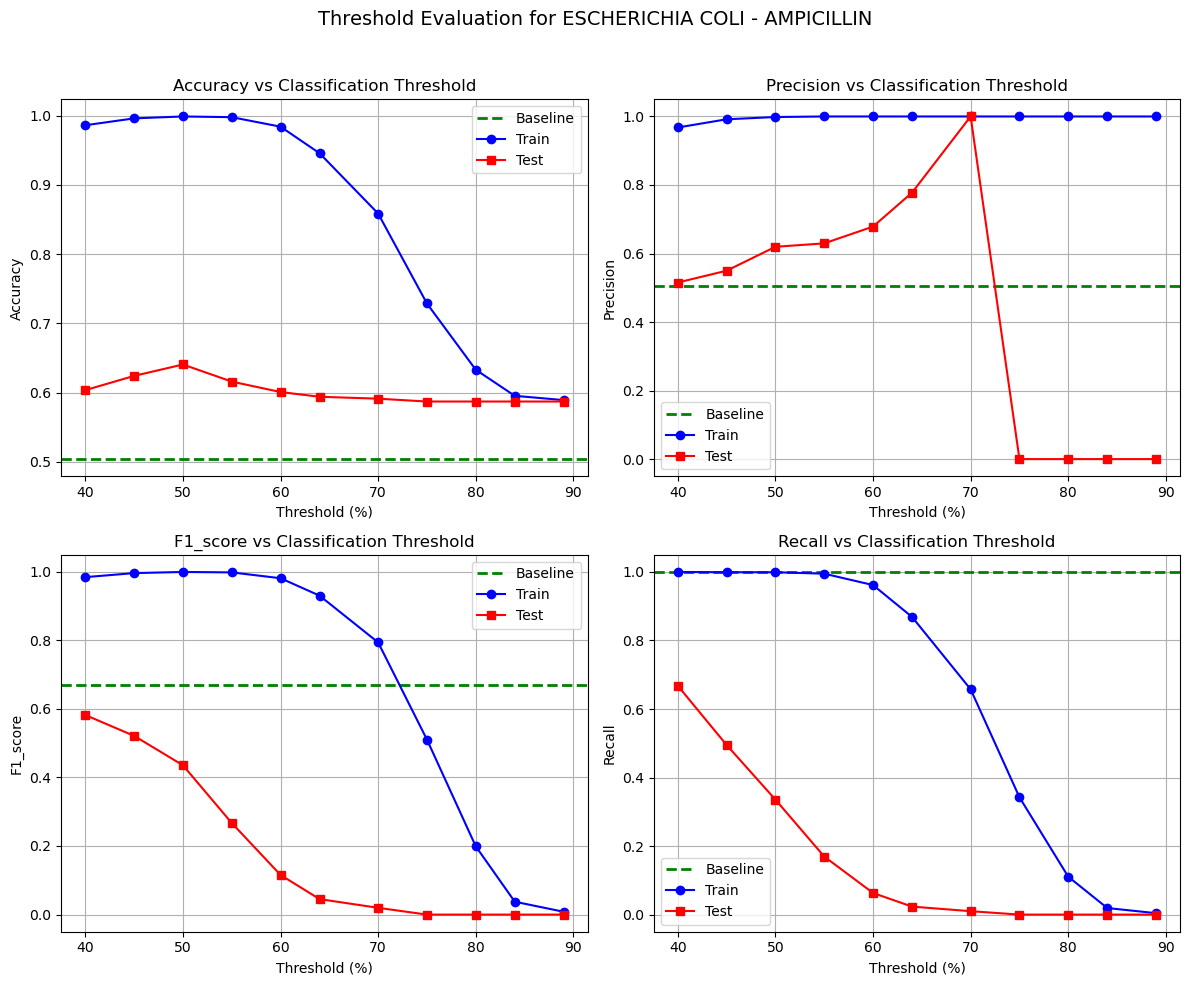

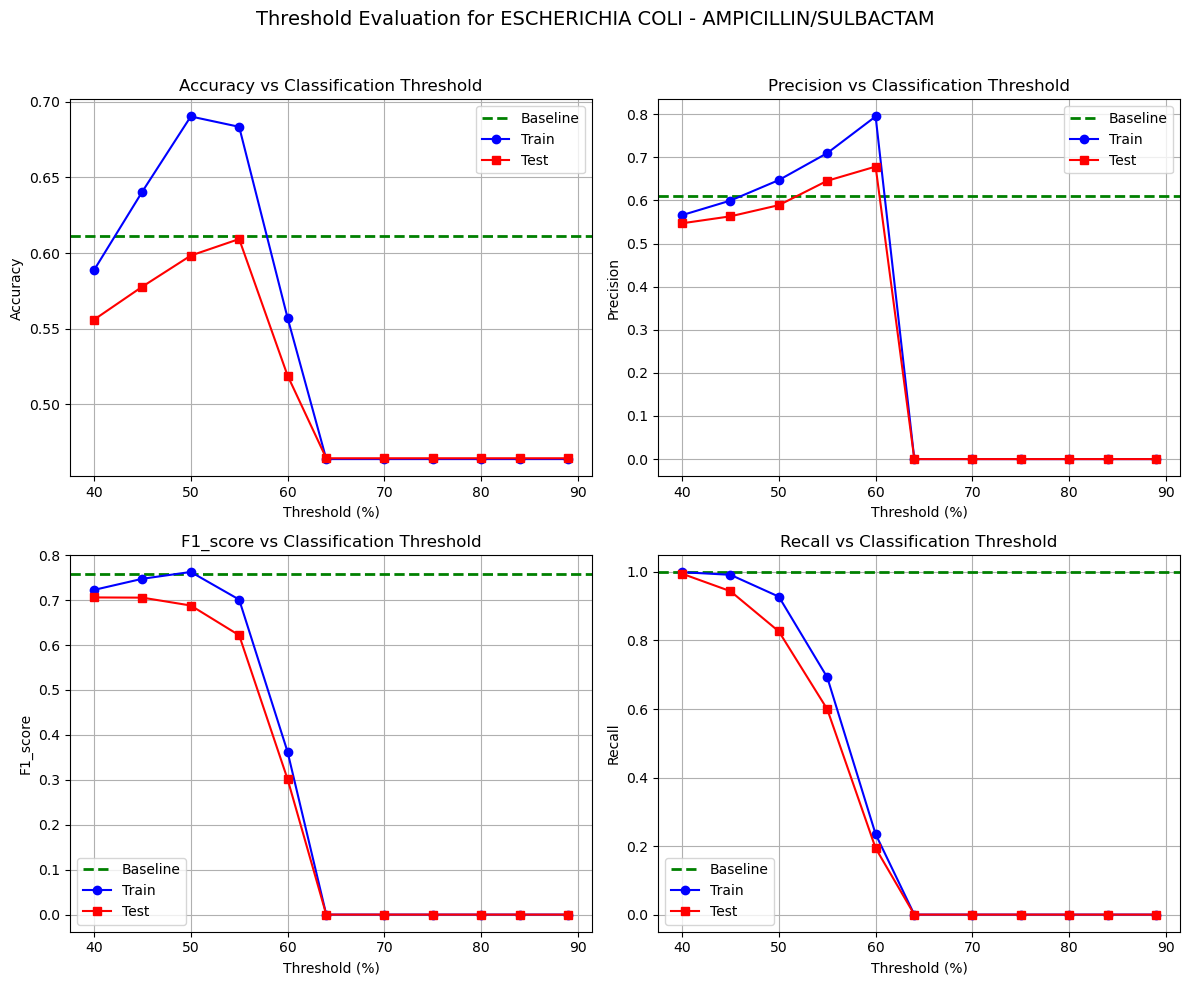

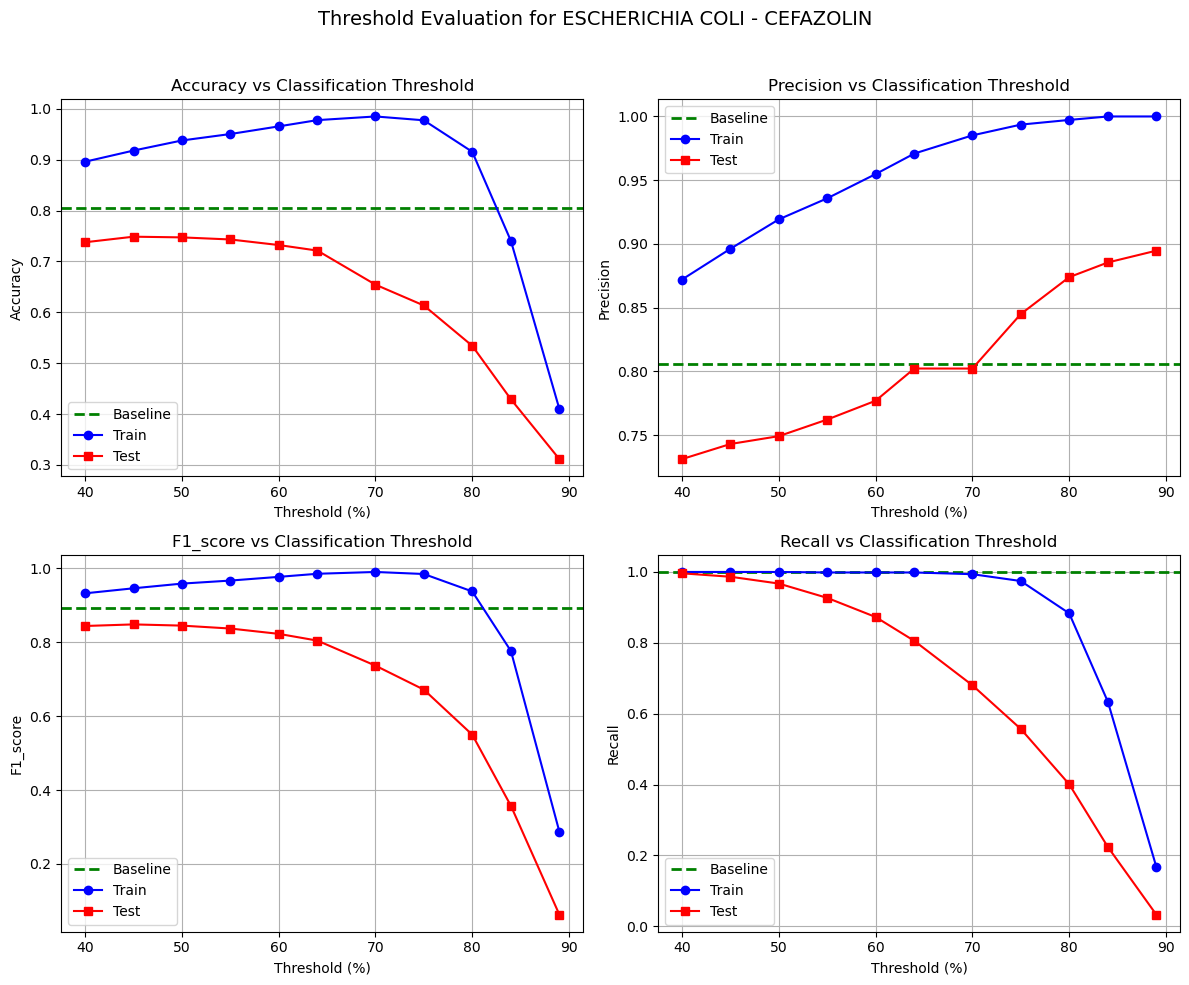

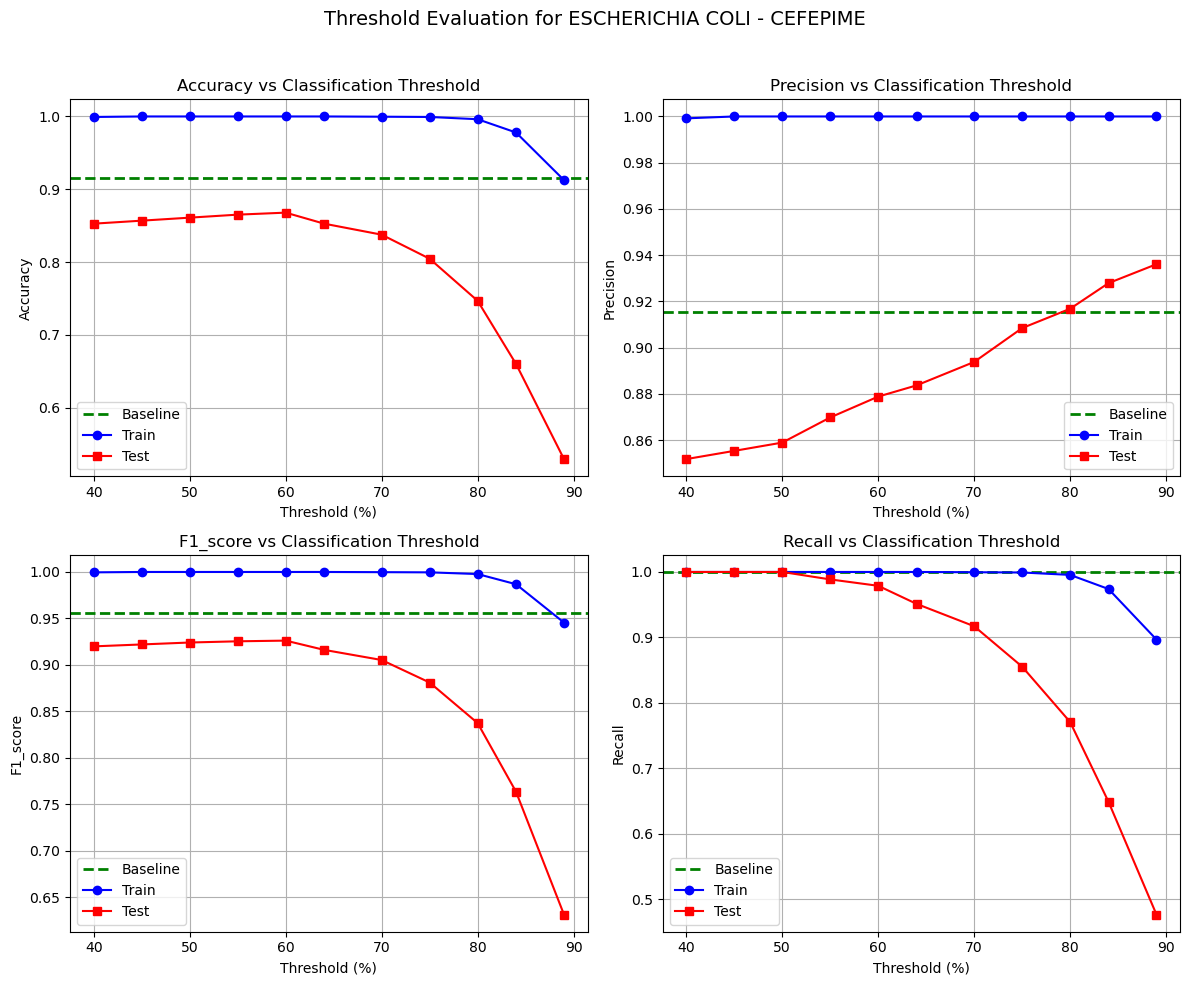

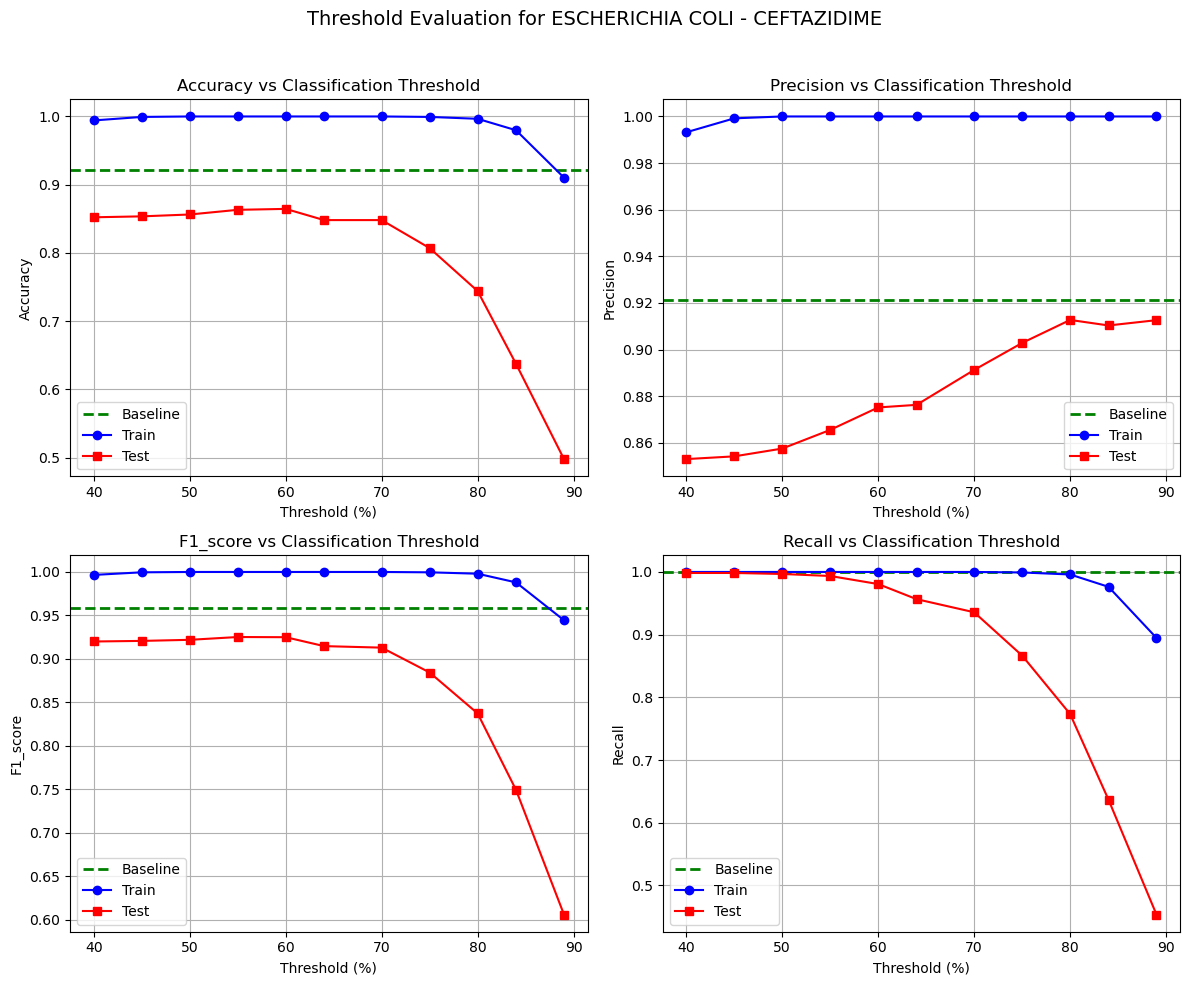

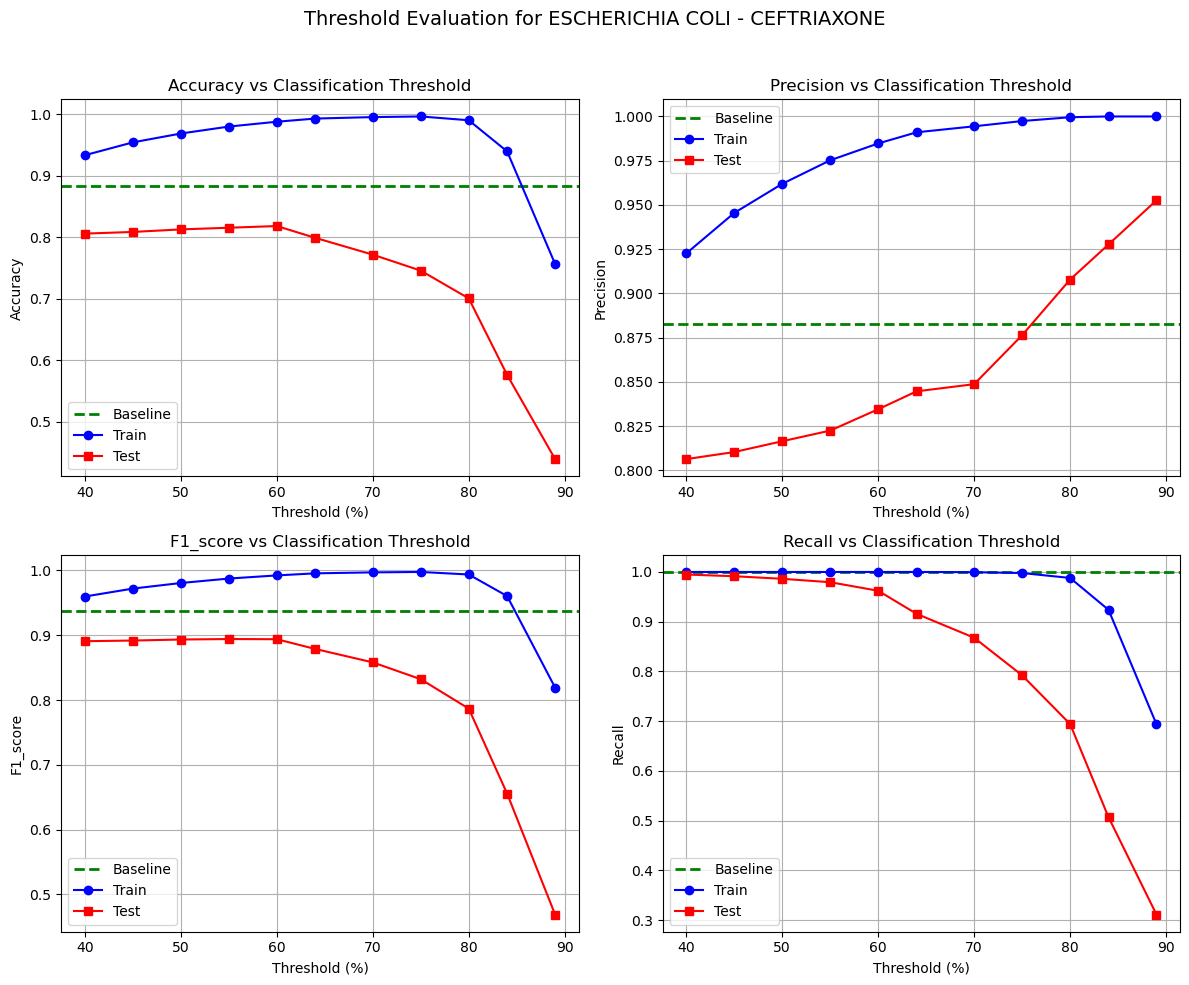

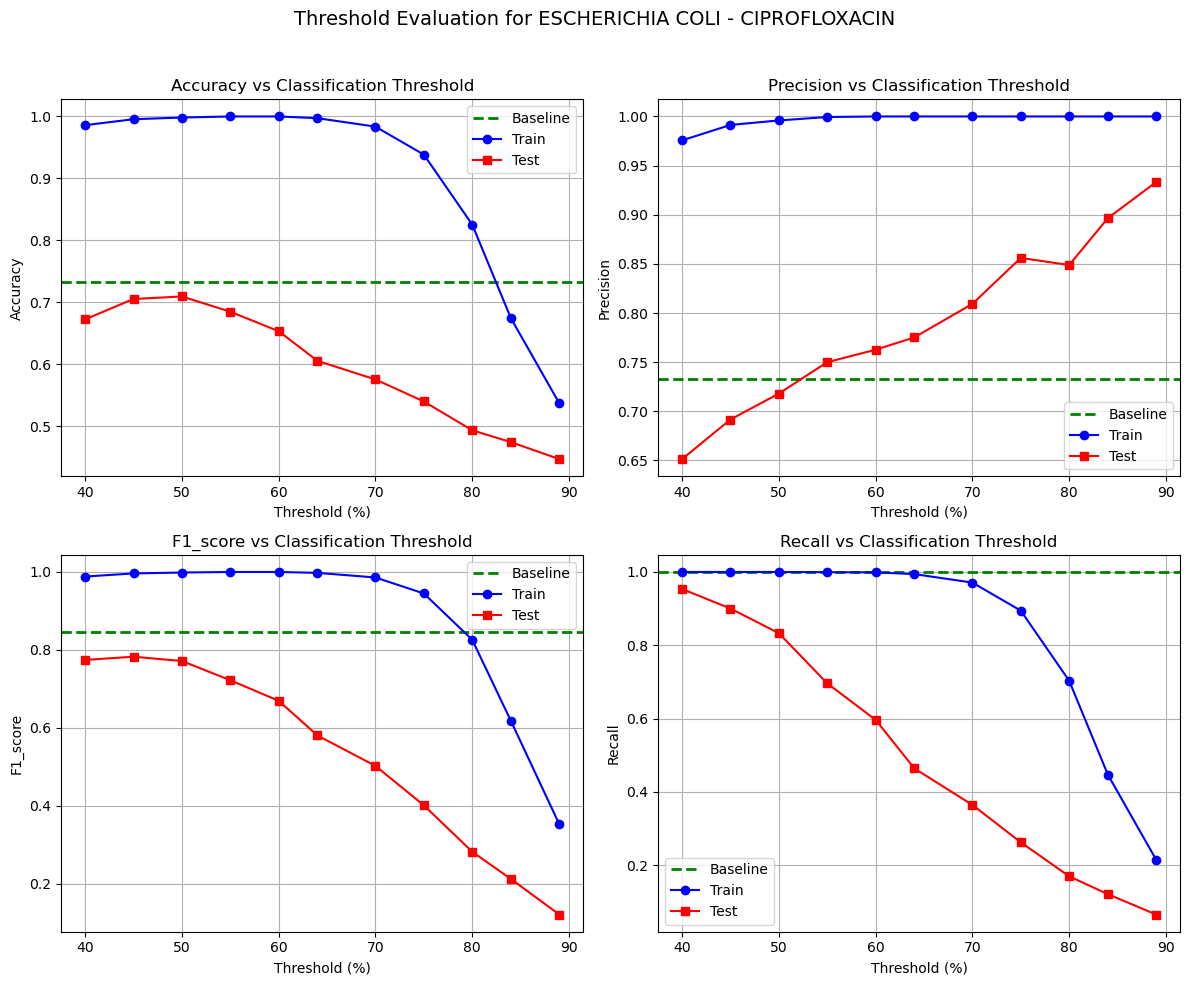

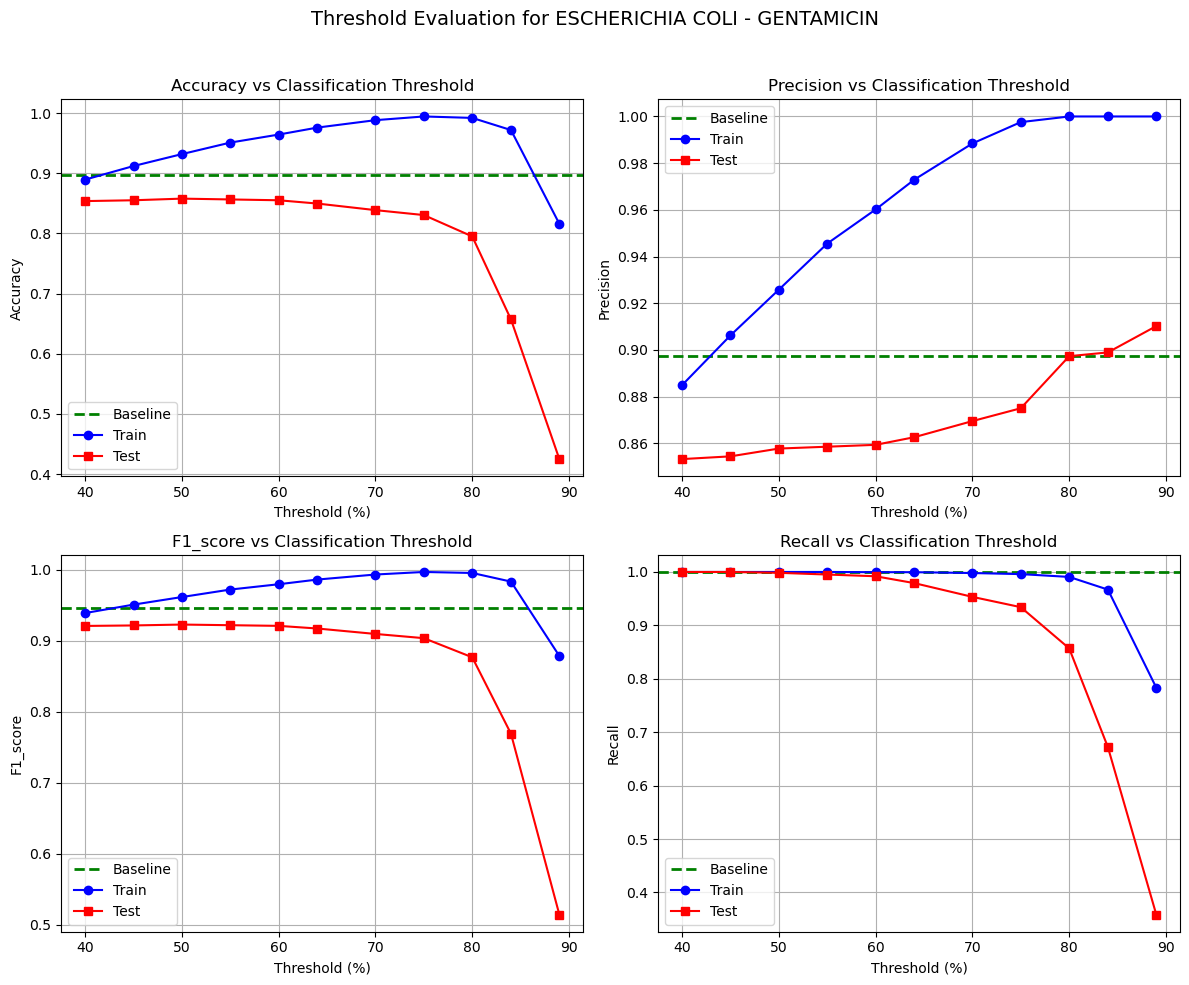

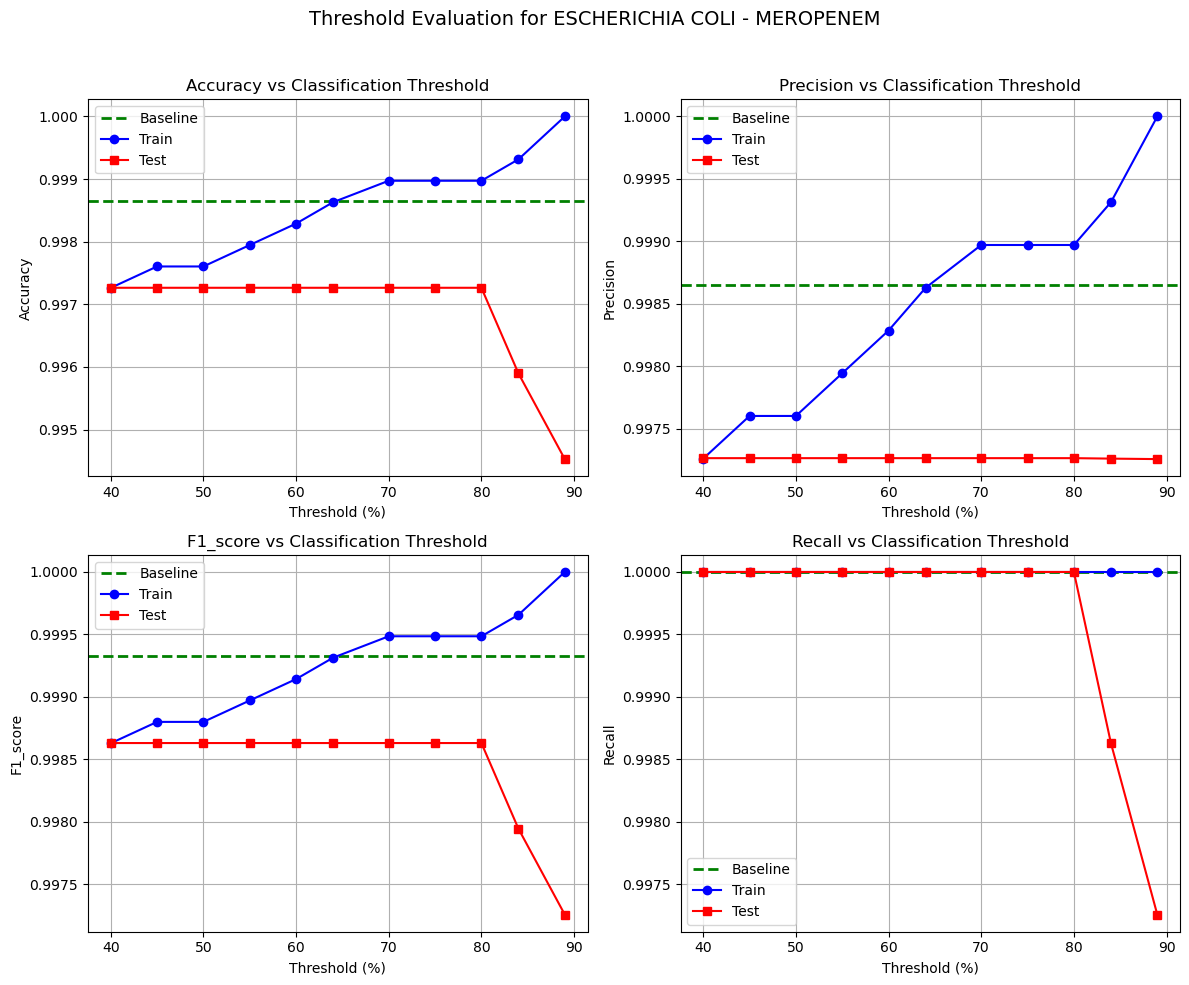

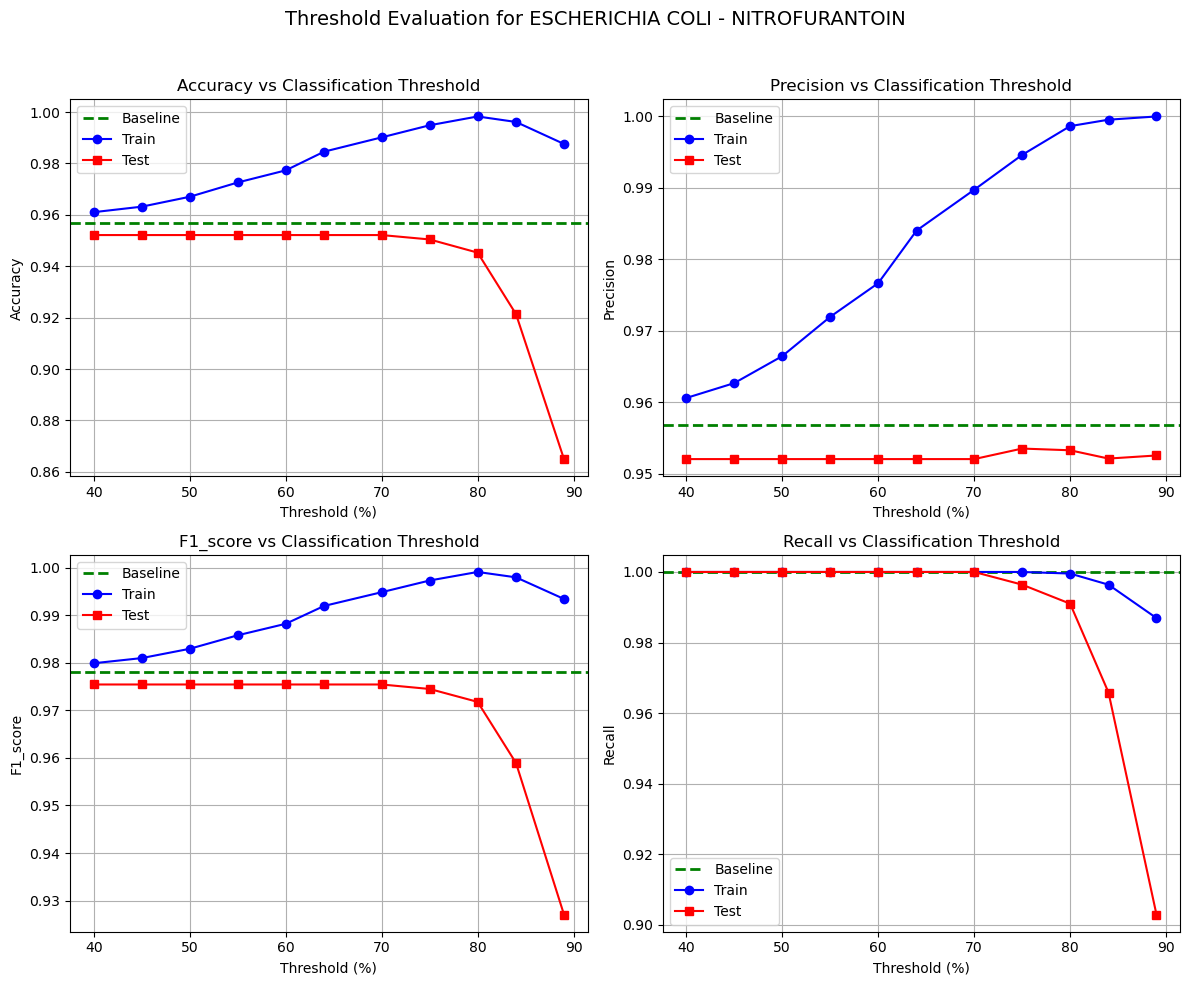

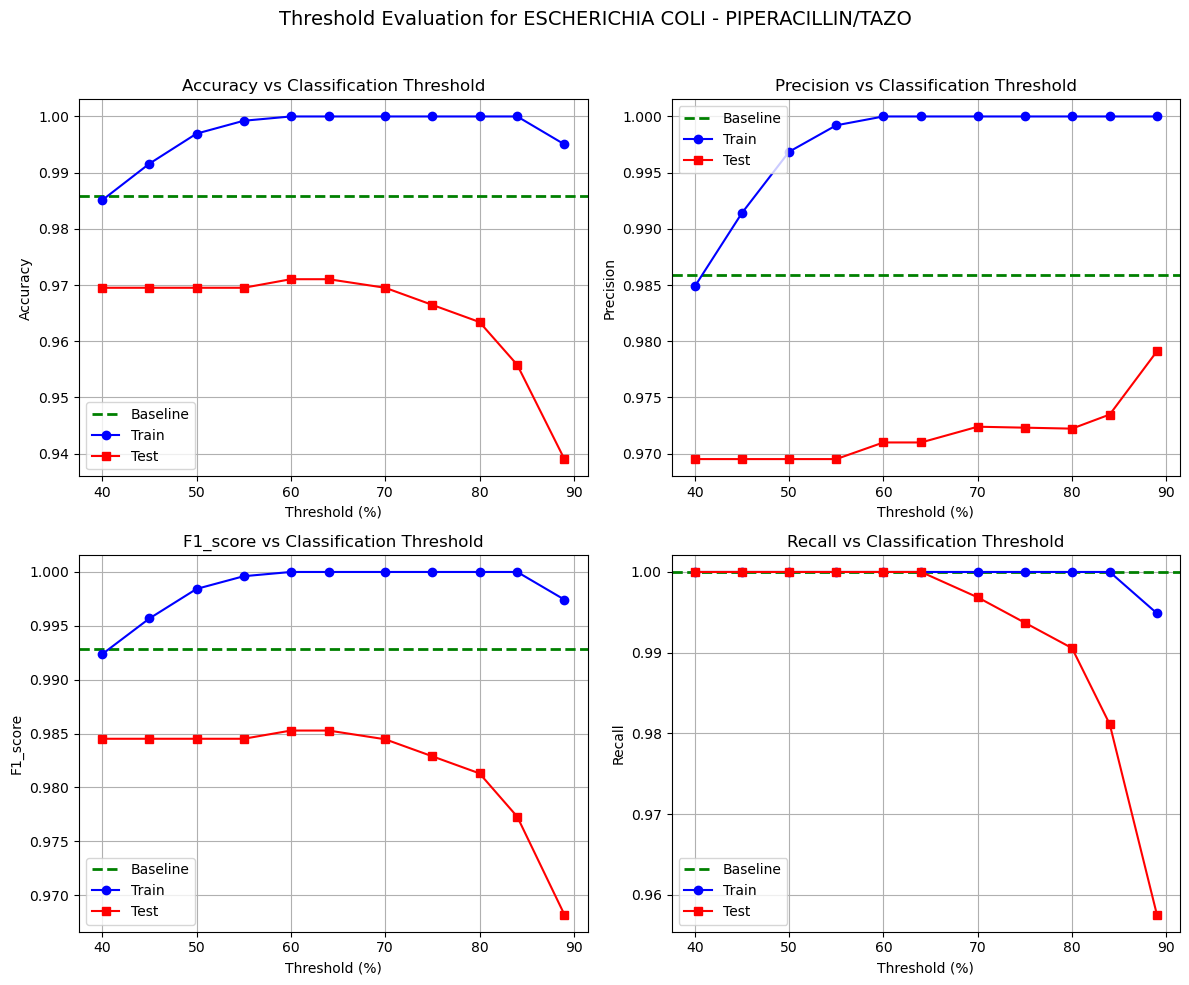

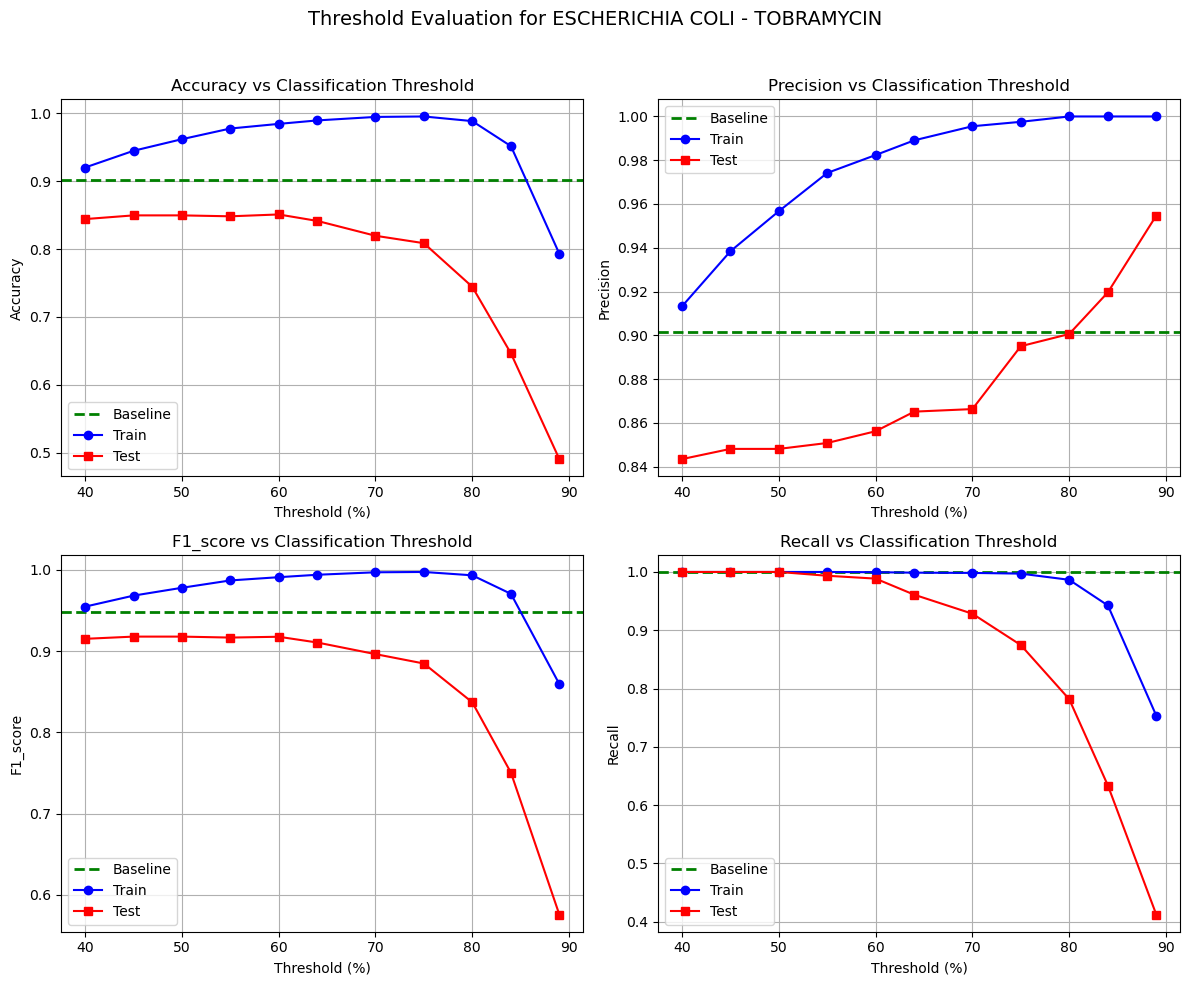

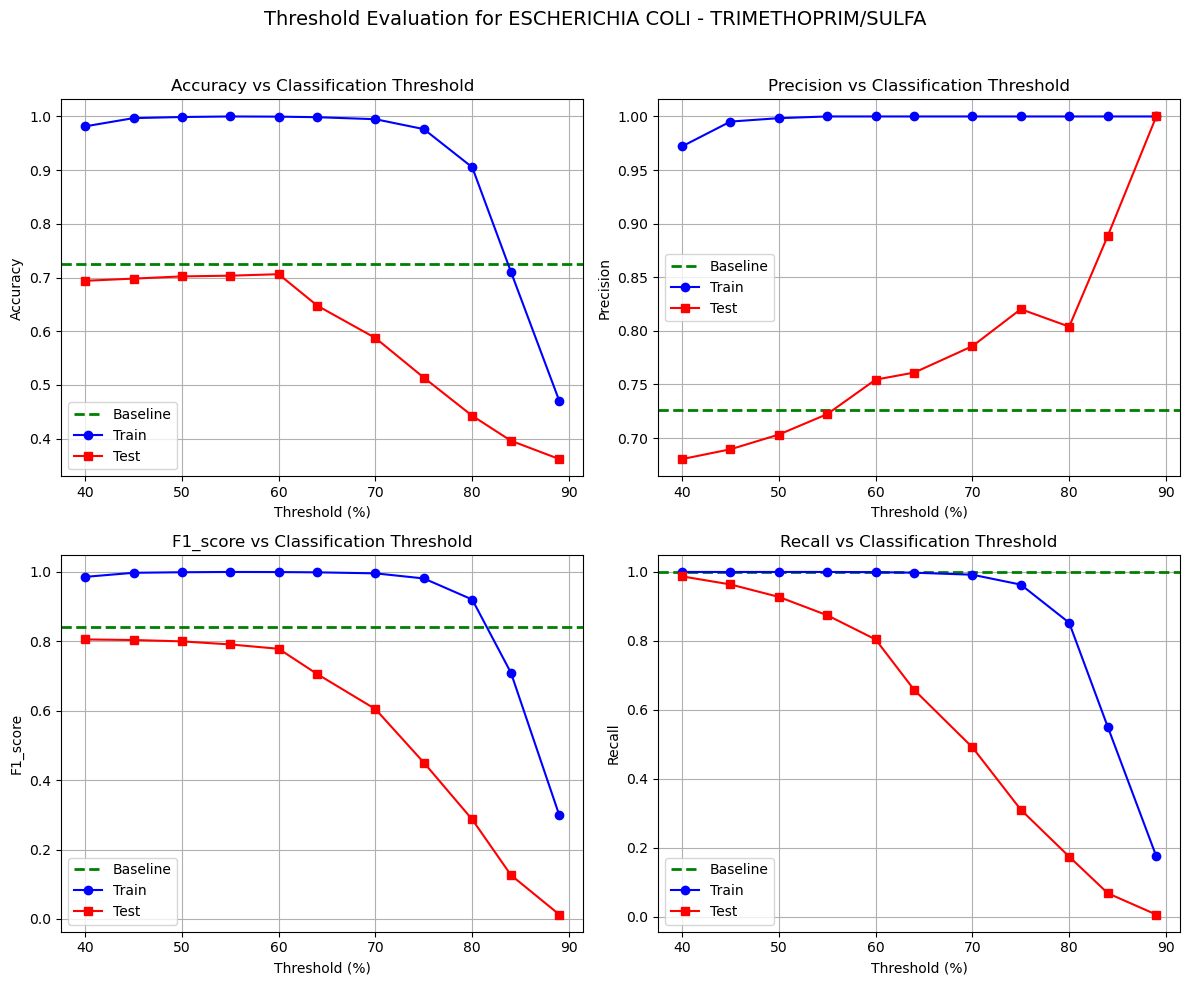

In [76]:
import matplotlib.pyplot as plt

# Plot all metrics in a 2x2 grid for each bacteria-antibiotic pair
for bacteria, antibiotic in ecoli_antibiotic_pairs:

    # Create a 2x2 figure layout
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f"Threshold Evaluation for {bacteria} - {antibiotic}", fontsize=14)

    metrics = ["accuracy", "precision", "f1_score", "recall"]
    axes = axes.flatten()  # Flatten 2D array of axes for easy iteration

    for i, metric in enumerate(metrics):
        ax = axes[i]

        # Retrieve metric results
        if bacteria not in threshold_eval_dict or antibiotic not in threshold_eval_dict[bacteria]:
            print(f"No data found for {bacteria} - {antibiotic}.")
            continue

        metric_results = threshold_eval_dict[bacteria][antibiotic]

        if metric not in metric_results:
            print(f"Invalid metric: {metric}. Skipping...")
            continue

        thresholds = np.array(list(map(int, metric_results[metric].keys())))  # Convert threshold keys to numeric values
        train_values = [v[0] for v in metric_results[metric].values()]
        test_values = [v[1] for v in metric_results[metric].values()]

        # Retrieve baseline value
        baseline_value = baseline_results.loc[
            (baseline_results['bacteria'] == bacteria) & (baseline_results['antibiotic'] == antibiotic), metric
        ]

        if not baseline_value.empty:
            baseline_value = baseline_value.values[0]  # Extract single value
            ax.axhline(y=baseline_value, color="green", linestyle="dashed", linewidth=2, label="Baseline")

        # Plot train & test metrics
        ax.plot(thresholds, train_values, marker='o', linestyle='-', label="Train", color="blue")
        ax.plot(thresholds, test_values, marker='s', linestyle='-', label="Test", color="red")

        ax.set_xlabel("Threshold (%)")
        ax.set_ylabel(metric.capitalize())
        ax.set_title(f"{metric.capitalize()} vs Classification Threshold")
        ax.legend()
        ax.grid(True)

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for suptitle
    plt.show()

    print("\n\n\n\n\n")
